#### Select two classes and features which are linearly seprable from Iris dataset 

In [9]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits import mplot3d


iris = datasets.load_iris()
X = iris.data[0:100, [0,1, 3]]


y = iris.target[50:150]

#### Classes and Three Features are linearly seprable.

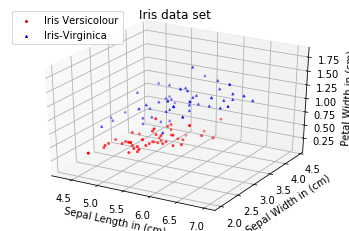

In [10]:
fig = plt.figure()


ax = plt.axes(projection='3d')

ax.set_title('Iris data set')

ax.set_xlabel("Sepal Length in (cm)")
ax.set_ylabel("Sepal Width in (cm)")
ax.set_zlabel("Petal Width in (cm)")


ax.scatter(X[:50, 0], X[:50, 1],X[:50,2], color='red', 
           marker='o', s=4, edgecolor='red', label="Iris Versicolour")
ax.scatter(X[50:100, 0], X[50:100, 1],X[50:100,2], color='blue', 
           marker='^', s=4, edgecolor='blue', label="Iris-Virginica")

plt.legend(loc='upper left')
plt.show()


#### Splitting data into 70% training and 30% test data & Standarizing the features.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)



sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [ 0 50 50]
Labels count in y_train: [ 0 35 35]
Labels count in y_test: [ 0 15 15]


#### Training Percepteron via Ski-Kit Learn

In [16]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 0


In [25]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 1.000


In [14]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 1.000


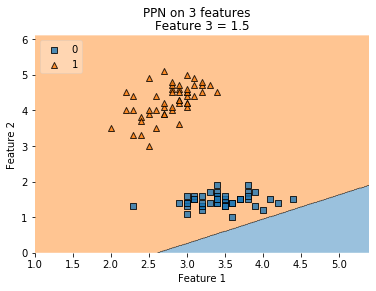

In [42]:
#from mlxtend.plotting import plot_decision_regions
#import matplotlib.pyplot as plt


# Plotting decision regions

#fig, ax = plt.subplots()

# Decision region for feature 3 = 1.5

#value = 1.5

# Plot training sample with feature 3 = 1.5 +/- 0.75

#width = 2.5
#plot_decision_regions(X, y, clf=ppn,
#                      filler_feature_values={2: value},
#                      filler_feature_ranges={2: width},
#                      legend=2, ax=ax)
#ax.set_xlabel('Feature 1')
#ax.set_ylabel('Feature 2')
#ax.set_title('Feature 3 = {}'.format(value))

# Adding axes annotations
#fig.suptitle('PPN on 3 features')
#plt.show()
